In [2]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

For this task, we want to explore the effects on prediction of a bug in the collection of the data: let's simulate a situation where a bug in transmission added a lot of identical rows to the dataset. We will make prediction of the mean speed of the ships from several datasets with several percentages of identical rows, and compare the results.

First, we import the dataset. We use again the static data for this task.

In [3]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

## Create and compare the datasets

We choose a row without a lot of missing values, to have an interesting row to copy.

In [4]:
static_data.head()

,TripID,MMSI,MeanSOG,VesselName,IMO,CallSign,VesselType,Length,Width,Draft,Cargo,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity,Duration
0,1,367114690,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes,0 days 02:40:39
1,2,367479990,6.536585,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,83.39,19.5,3.2,NaN,2017-01-01 00:00:03,2017-01-01 02:40:44,48.15891,-122.67268,48.11099,-122.75885,US,Coupeville,US,Port Townsend,0 days 02:40:41
2,3,368319000,0.000758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:08,2017-01-01 02:44:48,43.34576,-124.32142,43.34578,-124.32141,US,Barview,US,Barview,0 days 02:44:40
3,4,367154100,6.871111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:15,2017-01-01 02:33:28,46.74264,-124.93125,47.02928,-124.95153,US,Ocean Shores,US,Ocean Shores,0 days 02:33:13
4,5,367446870,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:59,2017-01-01 02:42:54,48.51320,-122.60718,48.51318,-122.60699,US,Anacortes,US,Anacortes,0 days 02:41:55


The second row will do. Now, we create a few datasets by adding this row 10 (``df10``), 100 (``df100``), 1000 (``df1000``) and 10000 (``df10000``) times. The creation of the last 2 datasets might take a bit of time (can take up to 1-2 minutes __TODO: change this when we have the server with the real execution time__).

In [5]:
line = static_data.loc[1]
df10 = static_data.append(line)
for i in range(9):
    df10 = df10.append(line)

In [6]:
line = static_data.loc[1]
df100 = df10.append(line)
for i in range(89):
    df100 = df100.append(line)

In [7]:
%%time
line = static_data.loc[1]
df1000 = df100.append(line)
for i in range(889):
    df1000 = df1000.append(line)

Wall time: 4.68 s


In [8]:
%%time
line = static_data.loc[1]
df10000 = df1000.append(line)
for i in range(8889):
    df10000 = df10000.append(line)

Wall time: 58.6 s


We can now have a look at the basic distribution of some of the new datasets. Look at how the distribution of the attributes change when we add identical data. Change the name of the dataset used to analyze the other datasets.

In [9]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420


In [11]:
# For beginner version: cell to hide

import ipywidgets as widgets
from ipywidgets import interact

datasets = ['Classic static dataset', 'df10', 'df100', 'df1000', 'df10000']

def show_describe(dataset):
    if dataset == 'Classic static dataset':
        print(static_data.describe())
    elif dataset == 'df10':
        print(df10.describe())
    elif dataset == 'df100':
        print(df100.describe())
    elif dataset == 'df1000':
        print(df1000.describe())
    elif dataset == 'df10000':
        print(df10000.describe())

interact(show_describe,
         dataset = widgets.Dropdown(options = datasets,
                                 value = datasets[0],
                                 description = 'Dataset:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Dataset:', options=('Classic static dataset', 'df10', 'df100', 'df…

<function __main__.show_describe(dataset)>

## Make the prediction on the datasets

Let's now do a prediction of the ``MeanSOG`` from the other attributes, for each of our datasets.

For that, we make a loop on each dataset, build a model and collect the error in the variable ``error``. Then, we print and plot the errors to look at the variation according to the dataset.

df: MAE = 1.2733923934326852
df10: MAE = 1.157407804442135
df100: MAE = 1.23786706177166
df1000: MAE = 0.9026804630340876
df10000: MAE = 0.20197894745555736


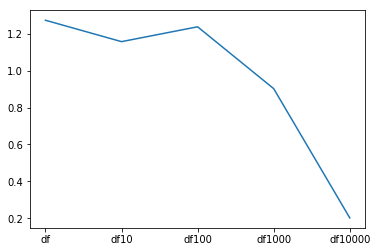

In [12]:
# Comparison of prediction of MeanSOG with normal static data and copied datasets

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

errors = [[], []]

static_data.name = 'df'
df10.name = 'df10'
df100.name = 'df100'
df1000.name = 'df1000'
df10000.name = 'df10000'

for df in [static_data, df10, df100, df1000, df10000]:
    predictions, y_test = knn_regression(df, x, y)
    error = mean_absolute_error(predictions, y_test)
    print(df.name + ': MAE = ' + str(error))
    
    errors[0].append(df.name)
    errors[1].append(error)
    
plt.plot(errors[0], errors[1])

## Analyze the results

We can see that the error decreases drastically when we add more identical rows to the dataset. This is due to the fact that the model then learns almost only from that row, and predicts only the value of that row. We can have a look at that by observing the predictions made by the model with 10000 copies of the row:

In [ ]:
predictions, y_test = knn_regression(df10000, x, y)
print(mean_absolute_error(predictions, y_test))



## Quiz

__TODO__